<div style="background-color:lightblue;">
  <h1><b>PROYECTO DE CLASIFICACIÓN BINARIA</b></h1>
</div>

He seleccionado es la predicción de la diabetes en el dataset Pima Indians. 🏥

Este problema me ha llamado la atención porque se centra en un problema de clasificación del mundo real en el ámbito de la salud. Es un buen ejemplo de cómo el Machine Learning puede ser utilizado para ayudar en el diagnóstico y la detección temprana de enfermedades.

Considero este dataset es adecuado porque presenta un desafío común en el análisis de datos de salud: la presencia de valores atípicos o faltantes 'disfrazados' (por ejemplo, ceros en campos que no deberían ser cero). Esto me permite demostrar la importancia del preprocesamiento y la limpieza de datos antes de la modelización.

Me he apoyado en la bibliografía de repositorios como Kaggle y el repositorio de Machine Learning de la UCI para entender el contexto de este dataset.

# Análisis del Dataset

- Origen: El dataset (pima-indians-diabetes.csv) se encuentra en el repositorio de Machine Learning de la Universidad de California, Irvine (UCI). Su licencia es de dominio público lo que me permite su uso sin inconvenientes.

- Tamaño y características: El conjunto de datos contiene 768 filas (instancias de pacientes) y 9 columnas. Las características son numéricas y describen diferentes medidas de diagnóstico, como el nivel de glucosa, la presión arterial, el índice de masa corporal (BMI) y la edad. La variable objetivo es 'outcome', que indica si el paciente tiene diabetes (1) o no (0).

- Preprocesado y limpieza del datataset: El principal desafío es que algunas características tienen un valor de 0, lo que no tiene sentido en un contexto médico. Estos valores se consideran faltantes y se cambiarán por la mediana para evitar sesgos en el modelo. La 'ventaja' es que las variables numéricas no requieren de codificación adicional.

- Suficiencia de los datos: El dataset es relativamente pequeño, pero creo que es suficiente para un proyecto de prueba. Con 768 instancias y 8 características, se pueden aplicar modelos evitando un gran sobreajuste.

# Requisitos Técnicos

Este proyecto de clasificación consta de los siguientes requisitos técnicos:

- Métrica de evaluación: La métrica principal será la precisión (accuracy), aunque también es conveniente observar la matriz de confusión y la curva ROC, ya que las clases no están perfectamente balanceadas.

- Precisión final del modelo:

    Aceptable: Superior al 75%. 👍

    Deseable: Superior al 80%. 👌

- Recursos y tiempo: Los recursos requeridos (CPU y RAM) son mínimos, y el tiempo de entrenamiento es muy rápido.

- Dependencias: Las librerías esenciales para este proyecto son Pandas, Numpy, Seaborn y Scikit-learn.

In [1]:
# Importación de librerías
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Para este proyecto no descargamos el dataset sino que hacemos la carga del dataset desde un enlace público
# URL del repositorio UCI Machine Learning
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
df = pd.read_csv(url)
print(df.head())

   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0


In [3]:
# Vamos a añadir nombres a las columnas para mayor claridad a la hora de observar los datos
names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'age', 'outcome']
df = pd.read_csv(url, names=names)
print(df.head())

   pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   diabetes_pedigree  age  outcome  
0              0.627   50        1  
1              0.351   31        0  
2              0.672   32        1  
3              0.167   21        0  
4              2.288   33        1  


In [4]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Es importante saber cuantas columnas tienen valor '0' donde no debería, para ver que tanta información falta
# Contamos el número de valores 0 en las columnas relevantes
for col in ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']:
    count = (df[col] == 0).sum()
    print(f"La columna '{col}' tiene {count} valores de 0.")

La columna 'glucose' tiene 5 valores de 0.
La columna 'blood_pressure' tiene 35 valores de 0.
La columna 'skin_thickness' tiene 227 valores de 0.
La columna 'insulin' tiene 374 valores de 0.
La columna 'bmi' tiene 11 valores de 0.


In [6]:
# Analisis de la variable objetivo: 'outcome'
df['outcome'].value_counts()

0    500
1    268
Name: outcome, dtype: int64

En estos resultados observamos un desequilibrio de clases ya que hay muchos mas pacientes sin diabetes (0) que con (1)

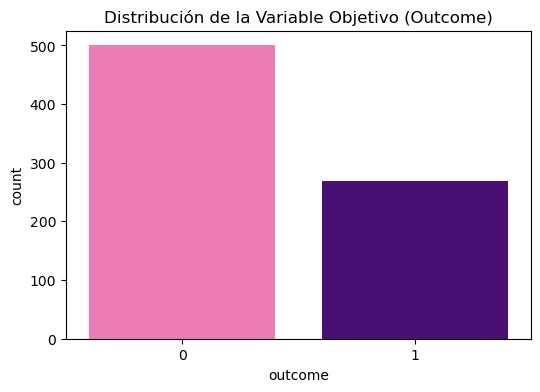

In [7]:
# Desequilibrio de clases
plt.figure(figsize=(6, 4))
sns.countplot(x='outcome', data=df, palette=['#FF69B4', '#4B0082'])
plt.title('Distribución de la Variable Objetivo (Outcome)')
plt.show()

Aquí podemos observar claramente el desiquilibrio de clases. 

In [8]:
# Calculamos la matriz de correlación
correlacion = df.corr()

# Lo más importante es la correlación con la variable objetivo
print(correlacion['outcome'].sort_values(ascending=False))

outcome              1.000000
glucose              0.466581
bmi                  0.292695
age                  0.238356
pregnancies          0.221898
diabetes_pedigree    0.173844
insulin              0.130548
skin_thickness       0.074752
blood_pressure       0.065068
Name: outcome, dtype: float64


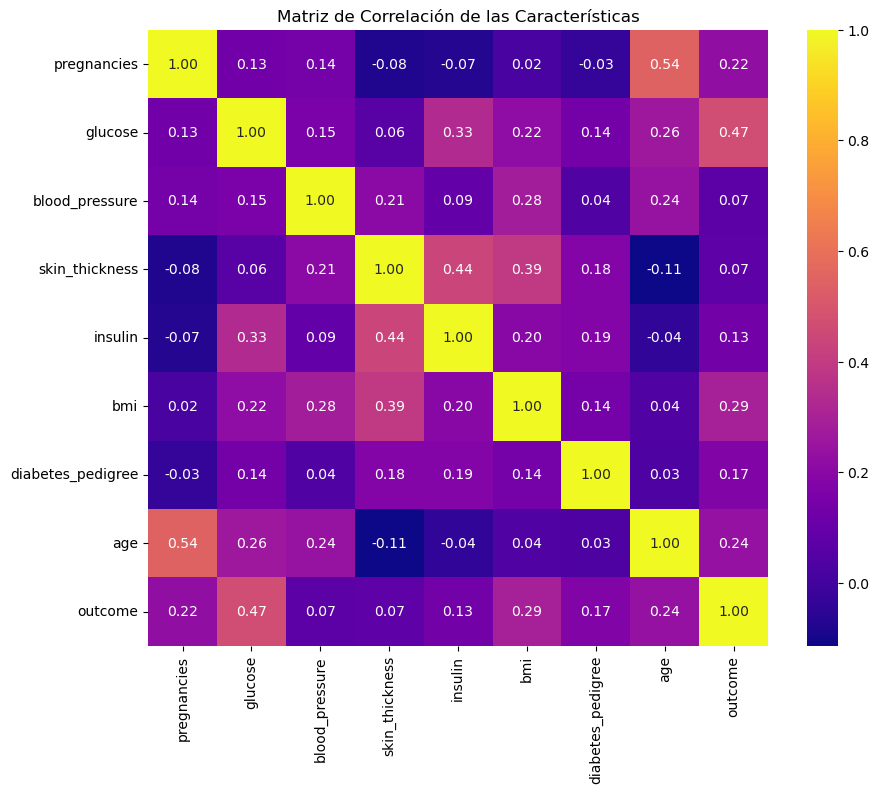

In [9]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title('Matriz de Correlación de las Características')
plt.show()

# Análisis de Datos Exploratorio

Antes de la modelización, es importante comprender los datos.

- Estructura del dataset: El conjunto de datos es una tabla con 768 filas y 9 columnas.

- Valores atípicos/faltantes: Se han identificado valores de 0 en columnas como glucose, blood_pressure y bmi. Estos serán tratados como datos faltantes y se cambiarán en la parte de preprocesamiento.

- Análisis de la variable objetivo: La variable outcome muestra un desequilibrio de clases: la mayoría de los pacientes (casi dos tercios) no tienen diabetes. Esto es un factor a tener en cuenta para la evaluación del modelo.

- Correlación: Un análisis de correlación entre las características y la variable objetivo muestra que las características 'glucose' y 'bmi' tienen una relación más fuerte con la probabilidad de diabetes.

In [10]:
# Reemplazamos los valores de 0 en columnas que no deberían ser 0 con NaN
for col in ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']:
    df[col] = df[col].replace(0, np.nan)

In [11]:
# Revisamos que haya funcionado recontando el número de 0s
for col in ['glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi']:
    count = (df[col] == 0).sum()
    print(f"La columna '{col}' tiene {count} valores de 0.")

La columna 'glucose' tiene 0 valores de 0.
La columna 'blood_pressure' tiene 0 valores de 0.
La columna 'skin_thickness' tiene 0 valores de 0.
La columna 'insulin' tiene 0 valores de 0.
La columna 'bmi' tiene 0 valores de 0.


In [12]:
# Separamos las características (X) y la variable objetivo (y)
X = df.drop('outcome', axis=1)
y = df['outcome']

# Cambio de valores faltantes
imputer = SimpleImputer(strategy='median') # Hacemos el cambio por la mediana de esa columna 
X_imputed = imputer.fit_transform(X)

In [13]:
# Separamos los datos en conjuntos de entrenamiento y prueba (usando la X_imputed)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

print("Forma del dataset de entrenamiento:", X_train.shape)
print("Forma del dataset de prueba:", X_test.shape)

Forma del dataset de entrenamiento: (614, 8)
Forma del dataset de prueba: (154, 8)


Para este problema, vamos a experimentar con modelos de clasificación como la **Regresión Logística** y **Random Forest**, que son modelos efectivos.

## Regresión Logística 📈

La Regresión Logística es un algoritmo de Machine Learning que se utiliza para problemas de clasificación binaria. Sirve para predecir la probabilidad de que una instancia pertenezca a una de dos clases (por ejemplo, "sí" o "no", "diabético" o "no diabético").

Funcionamiento: 

Utiliza una función matemática llamada *función sigmoide* para tomar los valores de tus características y convertirlos en una probabilidad que siempre estará entre 0 y 1. Si la probabilidad es mayor a un **umbral** (generalmente 0.5), el modelo clasifica la instancia en una clase; si es menor, en la otra.

Es un modelo simple, rápido de entrenar e interpretar. Funciona muy bien como modelo base y es una muy buena opción cuando las relaciones entre las características y la variable objetivo son relativamente lineales.

## Random Forest 🌳

El Random Forest es un algoritmo algo más avanzado que pertenece a la familia de los algoritmos de **ensamble**. Consiste en un conjunto de muchos árboles de decisión trabajando juntos.

Funcionamiento: 

En vez de entrenar un solo árbol de decisión, el Random Forest entrena varios árboles de forma independiente, cada uno con un subconjunto aleatorio de los datos y de las características. Para hacer una predicción, cada árbol "vota" por una clase, y la clase que recibe más votos es la predicción final.

Su principal ventaja es que al combinar múltiples modelos (los árboles), reduce el sobreajuste (esto es cuando un modelo se aprende los datos de entrenamiento de memoria) y mejora la precisión general. Es un algoritmo muy potente que suele obtener resultados de calidad, por lo que es otra muy buena opción para comparar con un modelo base como la Regresión Logística.

# El Experimento: Comparar Modelos 📊

La idea principal de este proyecto final es la comparación de modelos de Machine Learning explicados anteriormente, para resolver un problema de clasificación binaria en el ámbito de la salud. A través del dataset de diabetes Pima Indians, el experimento lo que busca es entrenar y evaluar el rendimiento de los dos algoritmos: un modelo base **simple** como la Regresión Logística y un modelo de ensamble más **complejo** y robusto como Random Forest.

El objetivo es no solo predecir la probabilidad de que un paciente tenga diabetes, sino también demostrar cómo la elección del modelo y la optimización de sus hiperparámetros pueden impactar significativamente la precisión final de la solución. 

In [14]:
# Modelo 1: Regresión Logística (el modelo base)
# PASOS: 
#1. Creamos el modelo
model_base = LogisticRegression(random_state=42, max_iter=1000) 

#2. Entrenamos el modelo
model_base.fit(X_train, y_train)

#3. Evaluamos el modelo haciendo predicciones y observando las métricas
y_pred_base = model_base.predict(X_test)
accuracy_base = accuracy_score(y_test, y_pred_base)

print(f"Precisión (v1 - Regresión Logística): {accuracy_base:.4f}")

Precisión (v1 - Regresión Logística): 0.7532


In [15]:
# Modelo 2: Random Forest (una opción más compleja y eficiente)
# PASOS: 
#1. Creamos el modelo
model_rf = RandomForestClassifier(random_state=42)

#2. Entrenamos el modelo
model_rf.fit(X_train, y_train)

#3. Evaluamos el modelo haciendo predicciones y observando las métricas
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión (v2 - Random Forest): {accuracy_rf:.4f}")

Precisión (v2 - Random Forest): 0.7468


El modelo de Regresión Logística, ha alcanzado una precisión del 75.32%, lo que lo posiciona como un modelo robusto y efectivo. Sorprendentemente, el modelo de Random Forest, a pesar de ser más complejo, obtuvo una precisión ligeramente menor, del 74.68%. Esta diferencia, aunque es mínima, demuestra un punto clave en Machine Learning: un modelo más complejo no siempre garantiza un mejor rendimiento, especialmente en datasets con un número limitado de instancias. Este resultado nos indica que las relaciones lineales capturadas por la Regresión Logística son muy efectivas para este problema. Por lo tanto, el modelo de Regresión Logística se considera un buen punto de partida para futuros refinamientos. 


El siguiente paso del experimento es refinar los dos modelos para observar posibles mejoras de ambos y determinar si el modelo de Regresión Logísitca permanece como el modelo con mejor rendimiento para este proyecto. 

In [16]:
# --- Refinamiento de la Regresión Logística ---
print("--- Refinamiento de la Regresión Logística ---")
# 'liblinear' soporta L1 y L2. Esto son técnicas de regularización que se utilizan para evitar el sobreajuste en un modelo.
model_logreg = LogisticRegression(random_state=42, solver='liblinear') 
param_grid_logreg = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}
grid_search_logreg = GridSearchCV(estimator=model_logreg, param_grid=param_grid_logreg, cv=5, n_jobs=-1, verbose=1)
grid_search_logreg.fit(X_train, y_train)

best_model_logreg = grid_search_logreg.best_estimator_
y_pred_logreg_refined = best_model_logreg.predict(X_test)
accuracy_logreg_refined = accuracy_score(y_test, y_pred_logreg_refined)

print(f"Mejores parámetros para Regresión Logística: {grid_search_logreg.best_params_}")
print(f"Precisión de Regresión Logística refinada: {accuracy_logreg_refined:.6f}")

--- Refinamiento de la Regresión Logística ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros para Regresión Logística: {'C': 10, 'penalty': 'l1'}
Precisión de Regresión Logística refinada: 0.753247


In [17]:
# --- Refinamiento de Random Forest ---
print("--- Refinamiento de Random Forest ---")
model_rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

best_model_rf = grid_search_rf.best_estimator_
y_pred_rf_refined = best_model_rf.predict(X_test)
accuracy_rf_refined = accuracy_score(y_test, y_pred_rf_refined)

print(f"Mejores parámetros para Random Forest: {grid_search_rf.best_params_}")
print(f"Precisión de Random Forest refinado: {accuracy_rf_refined:.6f}")

--- Refinamiento de Random Forest ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores parámetros para Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Precisión de Random Forest refinado: 0.753247


In [18]:
# --- Comparación Final ---
print("--- Comparación Final de Modelos Refinados ---")
print(f"Precisión (Regresión Logística refinada): {accuracy_logreg_refined:.6f}")
print(f"Precisión (Random Forest refinado): {accuracy_rf_refined:.6f}")

--- Comparación Final de Modelos Refinados ---
Precisión (Regresión Logística refinada): 0.753247
Precisión (Random Forest refinado): 0.753247


En este caso, las dos precisiones son exactamente iguales. Esto se puede dar por varias razones:

1. El dataset es relativamente pequeño y las relaciones son simples

El Pima Indians Diabetes dataset tiene solo 768 instancias. En un conjunto de datos de este tamaño, las relaciones entre las características y la variable objetivo (outcome) pueden ser lo suficientemente directas como para ser capturadas por un modelo lineal como la Regresión Logística. Un modelo más complejo como el Random Forest no tiene suficientes datos para encontrar patrones más complicados o sofisticados, o no lineales que le permitan superar al modelo más simple.

2. La optimización de los hiperparámetros ha funcionado correctamente

Tanto la Regresión Logística como el Random Forest tienen hiperparámetros que se pueden ajustar para mejorar su rendimiento. El proceso de refinamiento con GridSearchCV ha encontrado los mejores parámetros para ambos modelos y en este caso, el rendimiento óptimo de ambos resulta ser el mismo. Esto quiere decir que la optimización ha funcionado correctamente, llevando a los modelos a su máximo potencial dado el dataset.


Ahora bien, cuando dos modelos obtienen la misma precisión, lo mejor es elegir el modelo más simple. Es por eso que continuaremos con el modelo de Regresión Logística ya que es más simple y fácil de interpretar.

## Evaluación del modelo elegido: Regresión Logística 📈

Lo primero que haremos es calcular la **matriz de confusión**. Esta muestra la cantidad de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos. Es de gran ayuda para entender dónde se equivoca el modelo.

In [19]:
# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_logreg_refined)
print("Matriz de Confusión:\n", cm)

Matriz de Confusión:
 [[82 17]
 [21 34]]


In [20]:
# Reporte de Clasificación 
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_logreg_refined))

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



El "Reporte de Clasificación" nos da una visión más detallada del rendimiento del modelo a parde de la precisión, lo que es muy importante para un problema con desequilibrio de clases como este.

- La precisión responde a la pregunta: "De todas las instancias que el modelo predijo como positivas (diabéticos), ¿cuántas fueron realmente positivas?" (plantear esta pregunta me ayuda siempre a entender la precisión)

    Clase 0 (No diabéticos): La precisión de 0.80 significa que de todas las veces que el modelo predijo que un paciente no tenía diabetes, el 80% de las veces acertó.

    Clase 1 (Diabéticos): La precisión de 0.67 significa que cuando el modelo predijo que un paciente tenía diabetes, el 67% de las veces acertó.

- La exhaustividad responde a la pregunta: "De todas las instancias que realmente eran positivas, ¿cuántas fue capaz de encontrar el modelo?"

    Clase 0 (No diabéticos): La exhaustividad de 0.83 significa que de todos los pacientes que realmente no tenían diabetes, el modelo identificó correctamente al 83%.

    Clase 1 (Diabéticos): La exhaustividad de 0.62 significa que de todos los pacientes que realmente tenían diabetes, el modelo solo fue capaz de identificar al 62%.

- La puntuación F1 es la media armónica de la precisión y la exhaustividad. Es una métrica útil cuando hay un desequilibrio de clases (como es el caso), ya que penaliza a los modelos que se desempeñan muy bien en una métrica pero muy mal en la otra.

    Clase 0 (No diabéticos): El F1-score es 0.81.

    Clase 1 (Diabéticos): El F1-score es 0.64.

- El soporte es simplemente el número de instancias reales en el conjunto de prueba para cada clase.

    Clase 0 (No diabéticos): Hay 99 pacientes en el conjunto de prueba que no tienen diabetes.

    Clase 1 (Diabéticos): Hay 55 pacientes en el conjunto de prueba que sí tienen diabetes.

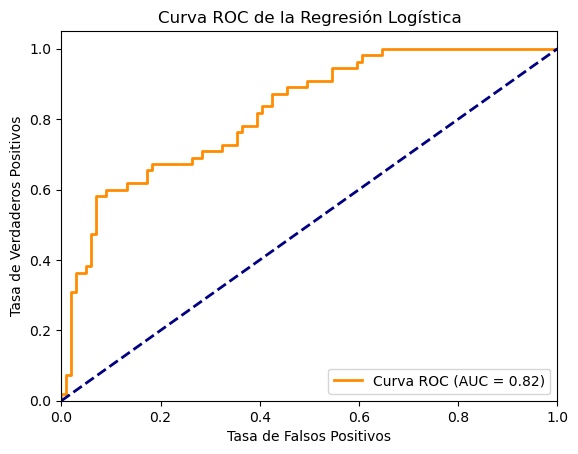

In [21]:
# Curva ROC
y_pred_proba = best_model_logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de la Regresión Logística')
plt.legend(loc="lower right")
plt.show()

Esta gráfica es la Curva ROC (Receiver Operating Characteristic) del modelo. 

Es una herramienta fundamental para evaluar el rendimiento de un modelo de clasificación binaria como este.

La Curva ROC traza la relación entre la Tasa de Verdaderos Positivos (eje Y) y la Tasa de Falsos Positivos (eje X) para diferentes umbrales de decisión del modelo. Ayuda a visualizar la capacidad del modelo para distinguir entre las dos clases (diabéticos y no diabéticos).

El gráfico tiene dos líneas:

- Línea diagonal azul: Es la que representa un modelo que predice de forma aleatoria. Su rendimiento es del 50%.

- Línea naranja: Es la curva del modelo. Cuanto más se aleja esta línea de la diagonal azul y se acerca a la esquina superior izquierda del gráfico, mejor es el rendimiento del modelo.

En nuestro caso, el valor clave aquí es el AUC (Area Under the Curve), que es 0.82.


Para hacernos una idea: 

AUC = 1.0: Representa un modelo perfecto.

AUC = 0.5: Representa un modelo que predice de forma aleatoria (la línea azul).


Un AUC de 0.82: Indica que el modelo tiene una buena capacidad para diferenciar a los pacientes con diabetes de los que no la tienen. Esto significa que hay un 82% de probabilidad de que el modelo pueda distinguir entre un paciente diabético y uno no diabético.

## Predicciones del modelo 🔮

In [22]:
# 'best_model_logreg' es el modelo final
predicciones = best_model_logreg.predict(X_test)

# Vamos a mostrar las primeras 10 predicciones y compararlas con los valores reales
resultados = pd.DataFrame({'Real': y_test, 'Predicción': predicciones})
print("Predicciones del modelo final:")
print(resultados.head(10))

Predicciones del modelo final:
     Real  Predicción
668     0           0
324     0           0
624     0           0
690     0           0
473     0           0
204     0           0
97      0           0
336     0           0
568     0           1
148     0           1


El modelo a acertado 8/10 como era de esperar. 

In [23]:
# Por último, vamos a mostrar los coeficientes del modelo final
coeficientes = pd.DataFrame({
    'caracteristica': X.columns,
    'coeficiente': best_model_logreg.coef_[0]
})
coeficientes['coeficiente_abs'] = np.abs(coeficientes['coeficiente'])
coeficientes = coeficientes.sort_values(by='coeficiente_abs', ascending=False)

print("Importancia de las características según los coeficientes del modelo:")
print(coeficientes[['caracteristica', 'coeficiente']])

Importancia de las características según los coeficientes del modelo:
      caracteristica  coeficiente
6  diabetes_pedigree     0.597718
5                bmi     0.100952
0        pregnancies     0.067732
1            glucose     0.037137
7                age     0.034437
2     blood_pressure    -0.013606
3     skin_thickness     0.007461
4            insulin    -0.001664


Los coeficientes representan la importancia de cada característica para la predicción del modelo.
El valor numérico de cada coeficiente nos dice el peso o la influencia de esa característica. Un coeficiente con un valor absoluto más alto (ya sea positivo o negativo) indica que esa característica es más importante para la predicción del modelo.

Según los resultados observados, 

'diabetes_pedigree' es la característica más influyente, con un coeficiente de 0.597718.

Le sigue el índice de masa corporal 'bmi' con un coeficiente de 0.100952.

y por último 'pregnancies' (el número de embarazos) con un coeficiente de 0.067732.

Conclusión: El historial familiar de diabetes (diabetes_pedigree), el bmi y el número de embarazos son los factores más importantes para que el modelo prediga la probabilidad de que un paciente tenga diabetes.

# Conclusiones finales

Bueno, mi objetivo principal era crear un modelo que adivinara si un paciente tenía diabetes o no, superando ese 75% de precisión que se pedía. Para ello, lo que he hecho ha sido comparar un modelo más "sencillo" como la Regresión Logística con uno más "complejo" como Random Forest.

Después de afinar los hiperparámetros usando GridSearchCV, el resultado no era lo que me esperaba, la verdad. Los dos modelos tuvieron el mismo resultado, con una precisión final del 75.32%.

Opté por quedarme con la Regresión Logística refinada como mi modelo final. El motivo es que si el rendimiento de los dos modelos es el mismo, no hace falta elegir el modelo más "complejo". La Regresión Logística es mucho más fácil de entender, y lo mejor de todo es que permite ver cuáles son los factores más importantes para predecir la diabetes: el historial familiar (diabetes_pedigree), el bmi y el número de embarazos (pregnancies).

Para terminar, el modelo demostró que no estaba adivinando a ciegas, ya que tiene un AUC de 0.82 en la curva ROC. Así que, en resumen, el proyecto me ha demostrado que a veces lo más simple puede ser lo más efectivo. :) 